### S09 T01: Practicant amb training i test sets - Exercise 1

### - Exercici 1

Parteix el conjunt de dadesDelayedFlights.csv en train i test. Estudia els dos conjunts per separat, a nivell descriptiu.

In [16]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings('ignore')

In [17]:
# open dataset 
data = pd.read_csv('DelayedFlights.csv')
data.head()

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,335,N712SW,128.0,150.0,116.0,-14.0,8.0,IAD,TPA,810,4.0,8.0,0,N,0,NaN,NaN,NaN,NaN,NaN
1,1,2008,1,3,4,754.0,735,1002.0,1000,WN,3231,N772SW,128.0,145.0,113.0,2.0,19.0,IAD,TPA,810,5.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN
2,2,2008,1,3,4,628.0,620,804.0,750,WN,448,N428WN,96.0,90.0,76.0,14.0,8.0,IND,BWI,515,3.0,17.0,0,N,0,NaN,NaN,NaN,NaN,NaN
3,4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,3920,N464WN,90.0,90.0,77.0,34.0,34.0,IND,BWI,515,3.0,10.0,0,N,0,2.0,0.0,0.0,0.0,32.0
4,5,2008,1,3,4,1940.0,1915,2121.0,2110,WN,378,N726SW,101.0,115.0,87.0,11.0,25.0,IND,JAX,688,4.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN


Info about the columns in the dataset:

+ Year 2008
+ Month 1-12
+ DayofMonth 1-31
+ DayOfWeek 1 (Monday) - 7 (Sunday)
+ DepTime actual departure time (local, hhmm)
+ CRSDepTime scheduled departure time (local, hhmm)
+ ArrTime actual arrival time (local, hhmm)
+ CRSArrTime scheduled arrival time (local, hhmm)
+ UniqueCarrier unique carrier code
+ FlightNum flight number
+ TailNum plane tail number: aircraft registration, unique aircraft identifier
+ ActualElapsedTime in minutes
+ CRSElapsedTime in minutes
+ AirTime in minutes
+ ArrDelay arrival delay, in minutes: A flight is counted as "on time" if it operated less than 15 minutes later the scheduled time shown in the carriers' Computerized Reservations Systems (CRS).
+ DepDelay departure delay, in minutes
+ Origin origin IATA airport code
+ Dest destination IATA airport code
+ Distance in miles
+ TaxiIn taxi in time, in minutes
+ TaxiOut taxi out time in minutes
+ Cancelled *was the flight cancelled
+ CancellationCode reason for cancellation (A = carrier, B = weather, C = NAS, D = security)
+ Diverted 1 = yes, 0 = no
+ CarrierDelay in minutes: Carrier delay is within the control of the air carrier. Examples of occurrences that may determine carrier delay are: aircraft cleaning, aircraft damage, awaiting the arrival of connecting passengers or crew, baggage, bird strike, cargo loading, catering, computer, outage-carrier equipment, crew legality (pilot or attendant rest), damage by hazardous goods, engineering inspection, fueling, handling disabled passengers, late crew, lavatory servicing, maintenance, oversales, potable water servicing, removal of unruly passenger, slow boarding or seating, stowing carry-on baggage, weight and balance delays.
+ WeatherDelay in minutes: Weather delay is caused by extreme or hazardous weather conditions that are forecasted or manifest themselves on point of departure, enroute, or on point of arrival.
+ NASDelay in minutes: Delay that is within the control of the National Airspace System (NAS) may include: non-extreme weather conditions, airport operations, heavy traffic volume, air traffic control, etc.
+ SecurityDelay in minutes: Security delay is caused by evacuation of a terminal or concourse, re-boarding of aircraft because of security breach, inoperative screening equipment and/or long lines in excess of 29 minutes at screening areas.
+ LateAircraftDelay in minutes: Arrival delay at an airport due to the late arrival of the same aircraft at a previous airport. The ripple effect of an earlier delay at downstream airports is referred to as delay propagation.

In this exercise we want to evaluate the delay in flights, so firts we will delete all obsevations that belong to Cancelled and Diverted Flights.

In [18]:
len(data[data['Cancelled'] == 1]) + len(data[data['Diverted'] == 1])

8387

We have 8387 flights cancelled and diverted, we will drop this observations: 

In [19]:
data.drop(data[(data['Cancelled'] == 1) | (data['Diverted'] == 1)].index, inplace = True)

In [20]:
data.shape

(1928371, 30)

Now we can delete some columns we are not going to use: 

+ Unnamed column
+ 'Year' : all flights are from the same year, 2008. 
+ 'Flightnum' and 'Tailnum'  : these columns don´t contribute with any info about delays
+ 'Cancelled', 'CancellationCode', 'Diverted' : since we will be looking at delays we will drop these columns too

In [21]:
# drop first column (unnamed column)
data.drop(data.columns[0], axis= 1, inplace= True)

# drop the other columns
cols = ['Year', 'FlightNum', 'TailNum', 'Cancelled',  'CancellationCode', 'Diverted' ]
data.drop(cols, axis = 1, inplace= True)

In [22]:
data.shape

(1928371, 23)

In [23]:
data.info(null_counts = True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1928371 entries, 0 to 1936757
Data columns (total 23 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   Month              1928371 non-null  int64  
 1   DayofMonth         1928371 non-null  int64  
 2   DayOfWeek          1928371 non-null  int64  
 3   DepTime            1928371 non-null  float64
 4   CRSDepTime         1928371 non-null  int64  
 5   ArrTime            1928371 non-null  float64
 6   CRSArrTime         1928371 non-null  int64  
 7   UniqueCarrier      1928371 non-null  object 
 8   ActualElapsedTime  1928371 non-null  float64
 9   CRSElapsedTime     1928371 non-null  float64
 10  AirTime            1928371 non-null  float64
 11  ArrDelay           1928371 non-null  float64
 12  DepDelay           1928371 non-null  float64
 13  Origin             1928371 non-null  object 
 14  Dest               1928371 non-null  object 
 15  Distance           1928371 non-n

In [24]:
# lets check at the missing values: 
data.isnull().sum()

Month                     0
DayofMonth                0
DayOfWeek                 0
DepTime                   0
CRSDepTime                0
ArrTime                   0
CRSArrTime                0
UniqueCarrier             0
ActualElapsedTime         0
CRSElapsedTime            0
AirTime                   0
ArrDelay                  0
DepDelay                  0
Origin                    0
Dest                      0
Distance                  0
TaxiIn                    0
TaxiOut                   0
CarrierDelay         680883
WeatherDelay         680883
NASDelay             680883
SecurityDelay        680883
LateAircraftDelay    680883
dtype: int64

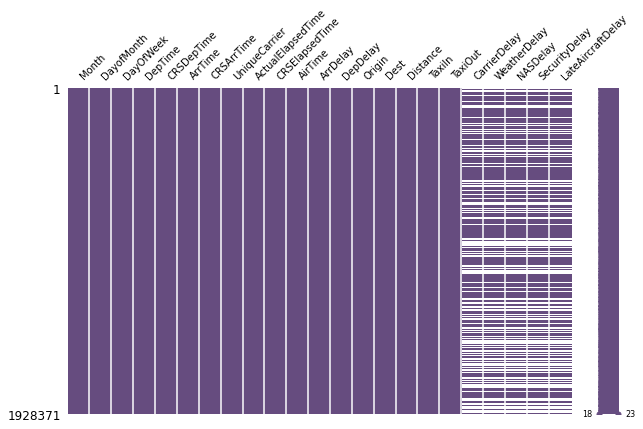

In [25]:
# if we want to see the distribution of missing values: 
import missingno as msno
msno.matrix(data, color=(0.4, 0.3, 0.5), figsize=(10,6),fontsize=(10)); 

We can see in this plot that missing values share the same rows. Missing values are in the columns 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay': in these columns we only have observations if the Delay in arrival is more than 15 minutes, so actually these rows with missing values mean than the delay was less than 15 minutes. We will replace these missing values with zeros. 

In [26]:
# to show the above on code, we filter  for delays bigger than 15 minutes and select one of the Delay columns (Delay 
# columns all share the same rows on missing values). We got no results, which tell us that null values in these rows 
# mean that they belong to flights with delay < 15 minutes 
filtering = data[(data['ArrDelay'] > 15) & (data['CarrierDelay'].isnull())]
len(filtering)

0

In [27]:
data.columns

Index(['Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'CRSDepTime', 'ArrTime',
       'CRSArrTime', 'UniqueCarrier', 'ActualElapsedTime', 'CRSElapsedTime',
       'AirTime', 'ArrDelay', 'DepDelay', 'Origin', 'Dest', 'Distance',
       'TaxiIn', 'TaxiOut', 'CarrierDelay', 'WeatherDelay', 'NASDelay',
       'SecurityDelay', 'LateAircraftDelay'],
      dtype='object')

In [28]:
# substitute Nan with 0 in cols: 'CarrierDelay', 'WeatherDelay', 'NASDelay','SecurityDelay', 'LateAircraftDelay' 
cols = ['CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay']
data[cols] = data[cols].fillna(0)

In [29]:
data.isnull().sum()

Month                0
DayofMonth           0
DayOfWeek            0
DepTime              0
CRSDepTime           0
ArrTime              0
CRSArrTime           0
UniqueCarrier        0
ActualElapsedTime    0
CRSElapsedTime       0
AirTime              0
ArrDelay             0
DepDelay             0
Origin               0
Dest                 0
Distance             0
TaxiIn               0
TaxiOut              0
CarrierDelay         0
WeatherDelay         0
NASDelay             0
SecurityDelay        0
LateAircraftDelay    0
dtype: int64

In [30]:
data.shape

(1928371, 23)

We have deleted 8387 rows from the dataframe, which is less than 1% of the observations. 

In [31]:
# take a glance of summary statistics before doing the split 
data.describe().round(2)

,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Distance,TaxiIn,TaxiOut,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
count,1928371.00,1928371.00,1928371.00,1928371.00,1928371.00,1928371.00,1928371.00,1928371.00,1928371.00,1928371.00,1928371.00,1928371.00,1928371.00,1928371.00,1928371.00,1928371.00,1928371.00,1928371.00,1928371.00,1928371.00
mean,6.11,15.75,3.98,1518.65,1467.72,1610.24,1634.20,133.31,134.20,108.28,42.20,43.09,764.95,6.81,18.22,12.41,2.40,9.72,0.06,16.36
std,3.48,8.78,2.00,450.44,424.73,548.00,464.63,72.06,71.23,68.64,56.78,53.27,573.89,5.27,14.31,36.20,17.38,28.14,1.63,35.92
min,1.00,1.00,1.00,1.00,0.00,1.00,0.00,14.00,-21.00,0.00,-109.00,6.00,11.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,3.00,8.00,2.00,1203.00,1135.00,1316.00,1325.00,80.00,82.00,58.00,9.00,12.00,338.00,4.00,10.00,0.00,0.00,0.00,0.00,0.00
50%,6.00,16.00,4.00,1545.00,1510.00,1715.00,1705.00,116.00,116.00,90.00,24.00,24.00,606.00,6.00,14.00,0.00,0.00,0.00,0.00,0.00
75%,9.00,23.00,6.00,1900.00,1815.00,2030.00,2014.00,165.00,165.00,137.00,56.00,53.00,997.00,8.00,21.00,10.00,0.00,6.00,0.00,18.00
max,12.00,31.00,7.00,2400.00,2359.00,2400.00,2359.00,1114.00,660.00,1091.00,2461.00,2467.00,4962.00,240.00,422.00,2436.00,1352.00,1357.00,392.00,1316.00


+ columns like DepTime, CRSDepTime, ArrTime, CRSArrTime have rows with 0 as minimum values, but they can be refering to the hour of the flight. 
+ In Airtime column we have minimum value of zero which cannot be true since we have alrady deleted columns of Cancelled flights. 

In [32]:
data[data['AirTime'] == 0]

,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
53543,1,5,6,1318.0,1140,1456.0,1258,OO,98.0,78.0,0.0,118.0,98.0,SGU,SLC,269,96.0,2.0,0.0,0.0,0.0,0.0,118.0
54342,1,6,7,1414.0,1307,1547.0,1403,OO,93.0,56.0,0.0,104.0,67.0,TWF,SLC,175,90.0,3.0,0.0,104.0,0.0,0.0,0.0
245633,2,12,2,1928.0,1631,2318.0,2015,OO,170.0,164.0,0.0,183.0,177.0,ASE,ORD,1013,8.0,162.0,0.0,0.0,183.0,0.0,0.0
414132,3,31,1,1540.0,1530,1804.0,1740,XE,144.0,130.0,0.0,24.0,10.0,MSY,MCI,690,4.0,140.0,0.0,0.0,24.0,0.0,0.0
441835,3,18,2,1759.0,1611,2132.0,1955,OO,153.0,164.0,0.0,97.0,108.0,ASE,ORD,1013,12.0,141.0,0.0,0.0,97.0,0.0,0.0
782761,5,21,3,1815.0,1805,1909.0,1857,OO,54.0,52.0,0.0,12.0,10.0,LAX,SAN,109,52.0,2.0,0.0,0.0,0.0,0.0,0.0
784702,5,27,2,1452.0,1437,1520.0,1522,OO,28.0,45.0,0.0,-2.0,15.0,SAN,LAX,109,25.0,3.0,0.0,0.0,0.0,0.0,0.0


In [33]:
# we will delete this observations, they are wrong observations: 
data.drop(data[data['AirTime'] == 0].index, inplace= True)

Since we know we have some rows that contain wrong observations, we will create a column for average speed for the flight and it will be easier to filter these observations:

In [34]:
# speed is in miles per hour 
# this column gives us avg speed 
data['Speed'] = ((data.Distance / data.AirTime) *60).round(2)
data['Speed'].describe().round(2)

count    1928364.00
mean         396.95
std           97.51
min           21.29
25%          351.86
50%          403.82
75%          448.15
max        55920.00
Name: Speed, dtype: float64

According to Google, the max speed in miles of a comercial aircraft shoud be around 660 mph, but this is not a constant, depending on circunstances it can reach higher speed but not above 1000 mph. Maybe rows with observations above 1000 mph are wrong annotations and shoul be deleted. 

We see minimum speed is 21.29, maybe there are wrong observations too for low Speed values, but in these cases we don' t know for sure, since we have calculated this with Distance and Airtime, but we are not taking into account other circunstances like the possibility of the plane circling around before landing. 

In [35]:
data[data['Speed'] >= 1000]

,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,Speed
25563,1,27,7,1557.0,1550,1622.0,1710,WN,25.0,80.0,12.0,-48.0,7.0,MCI,MDW,405,4.0,9.0,0.0,0.0,0.0,0.0,0.0,2025.00
32929,1,5,6,2245.0,1950,2346.0,2108,XE,61.0,78.0,3.0,158.0,175.0,SFO,LAX,337,11.0,47.0,0.0,3.0,0.0,0.0,155.0,6740.00
48034,1,9,3,2025.0,1844,2217.0,2110,OH,112.0,146.0,29.0,67.0,101.0,LGA,GSP,610,67.0,16.0,0.0,67.0,0.0,0.0,0.0,1262.07
49719,1,19,6,1625.0,1530,1807.0,1842,OH,42.0,132.0,30.0,-35.0,55.0,MSY,CVG,700,5.0,7.0,0.0,0.0,0.0,0.0,0.0,1400.00
50338,1,23,3,1708.0,1701,1805.0,1911,OH,57.0,130.0,25.0,-66.0,7.0,LGA,CMH,478,5.0,27.0,0.0,0.0,0.0,0.0,0.0,1147.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455994,9,19,5,1840.0,1815,2017.0,1950,OH,97.0,95.0,19.0,27.0,25.0,CHS,CVG,497,2.0,76.0,0.0,25.0,2.0,0.0,0.0,1569.47
1456204,9,22,1,1640.0,1610,1748.0,1740,OH,68.0,90.0,7.0,8.0,30.0,JFK,BWI,184,10.0,51.0,0.0,0.0,0.0,0.0,0.0,1577.14
1456830,9,27,6,1150.0,1110,1241.0,1241,OH,51.0,91.0,20.0,0.0,40.0,BOS,BWI,370,11.0,20.0,0.0,0.0,0.0,0.0,0.0,1110.00
1483229,9,15,1,1422.0,1415,1545.0,1539,EV,83.0,84.0,3.0,6.0,7.0,CAE,CVG,404,66.0,14.0,0.0,0.0,0.0,0.0,0.0,8080.00


We clearly see some rows have no sense so we will delete these rows (109 rows): 

In [36]:
data.drop(data[data.Speed >= 1000].index, inplace=True)
data.shape

(1928255, 24)

Now we will change the order of the columns: 

In [37]:
# first we will put the dependent variable, then all independent numeric columns and last categorical columns 
cols = ['ArrDelay', 'ActualElapsedTime', 'CRSElapsedTime','AirTime', 'DepDelay', 'Distance', 'Speed', 'TaxiIn', 'TaxiOut', 
        'CarrierDelay', 'WeatherDelay', 'NASDelay','SecurityDelay', 'LateAircraftDelay', 'DepTime', 'CRSDepTime', 'ArrTime', 
        'CRSArrTime','Month', 'DayofMonth', 'DayOfWeek', 'UniqueCarrier', 'Origin', 'Dest']

data = data[cols]
data.shape

(1928255, 24)

Now we will split the dataset in train and test, for this exercise we will not declare the target yet ('ArrDelay') because we want to see the relationships between the target and the other features. We will split the target when we do the Regression model (later when we do the regression models we will use the same test size and the same random state)

In [38]:
# Import the module for the split
from sklearn.model_selection import train_test_split
# use 70% for training and 30% for test
data_train, data_test = train_test_split(data, test_size= 0.3, random_state= 0)

In [39]:
data_train.shape

(1349778, 24)

In [40]:
data_test.shape

(578477, 24)

In [41]:
data_train.head()

,ArrDelay,ActualElapsedTime,CRSElapsedTime,AirTime,DepDelay,Distance,Speed,TaxiIn,TaxiOut,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,DepTime,CRSDepTime,ArrTime,CRSArrTime,Month,DayofMonth,DayOfWeek,UniqueCarrier,Origin,Dest
1419769,4.0,192.0,196.0,178.0,8.0,1303,439.21,4.0,10.0,0.0,0.0,0.0,0.0,0.0,653.0,645,1205.0,1201,8,9,6,CO,SAN,IAH
52525,29.0,117.0,104.0,89.0,16.0,588,396.40,14.0,14.0,29.0,0.0,0.0,0.0,0.0,1646.0,1630,1943.0,1914,1,3,4,OO,SNA,SLC
1559336,47.0,39.0,46.0,27.0,54.0,110,244.44,5.0,7.0,42.0,0.0,0.0,0.0,5.0,1350.0,1256,1429.0,1342,10,5,7,OO,PSP,LAX
941924,131.0,155.0,149.0,114.0,125.0,722,380.00,5.0,36.0,0.0,125.0,6.0,0.0,0.0,1550.0,1345,1825.0,1614,6,23,1,OH,LGA,SAV
1020519,60.0,85.0,80.0,63.0,55.0,408,388.57,4.0,18.0,55.0,0.0,5.0,0.0,0.0,725.0,630,850.0,750,6,30,1,MQ,JAX,RDU


#### Looking at numerical features: 

Since we have a large datasets with many columns we will plot some of them: 

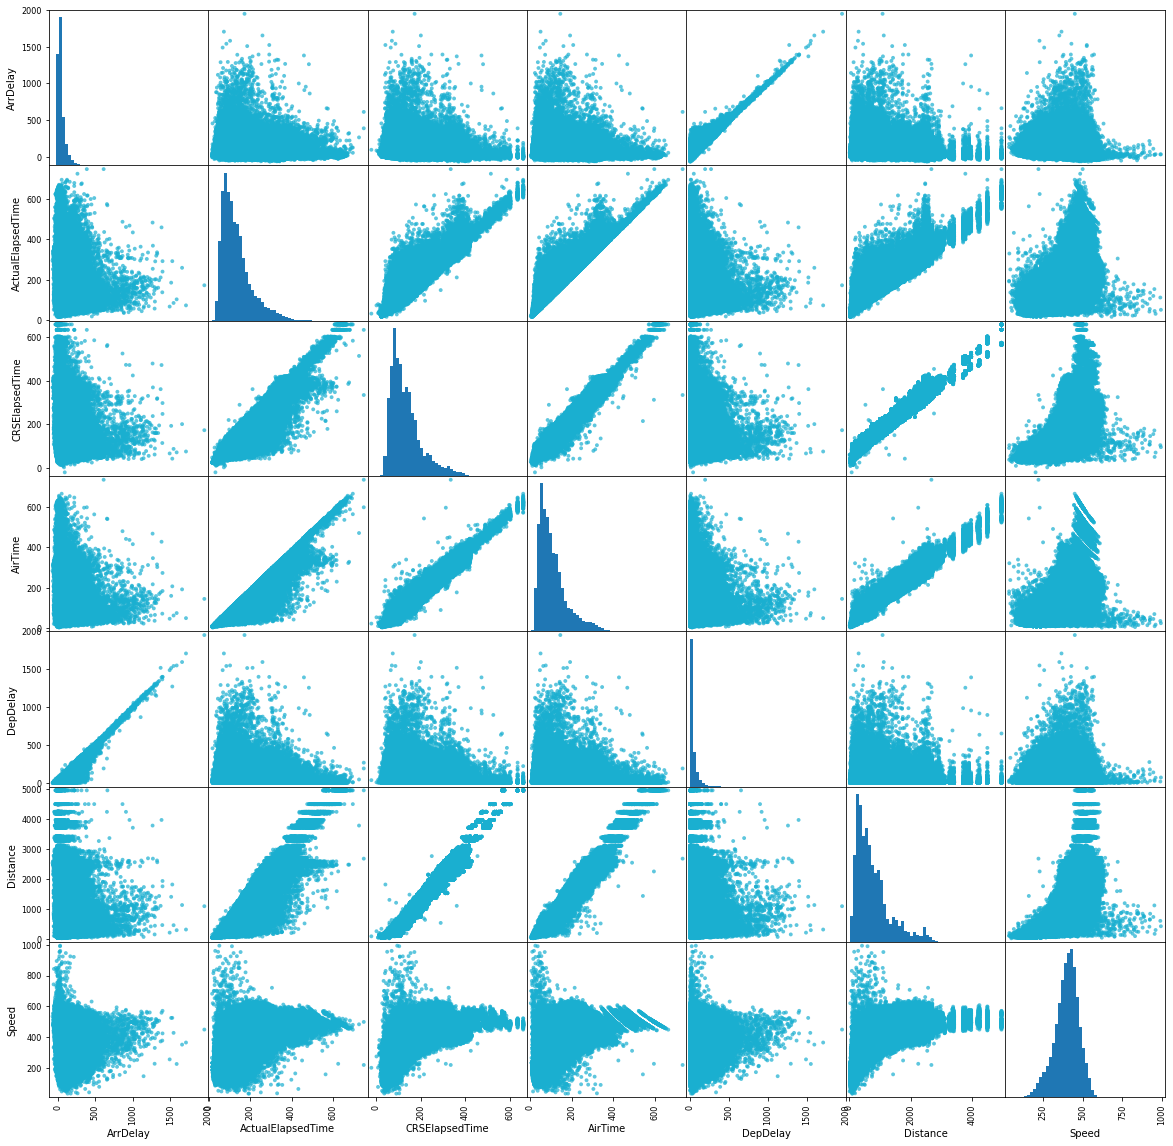

In [42]:
# we do some pairplots on the most important columns on data_train
cols = ['ArrDelay', 'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'DepDelay', 'Distance', 'Speed']

pd.plotting.scatter_matrix(data_train[cols] , figsize= (20,20),  hist_kwds = {'bins': 50}, alpha = 0.7 
                           , color = '#1aafd0', s = 60); 

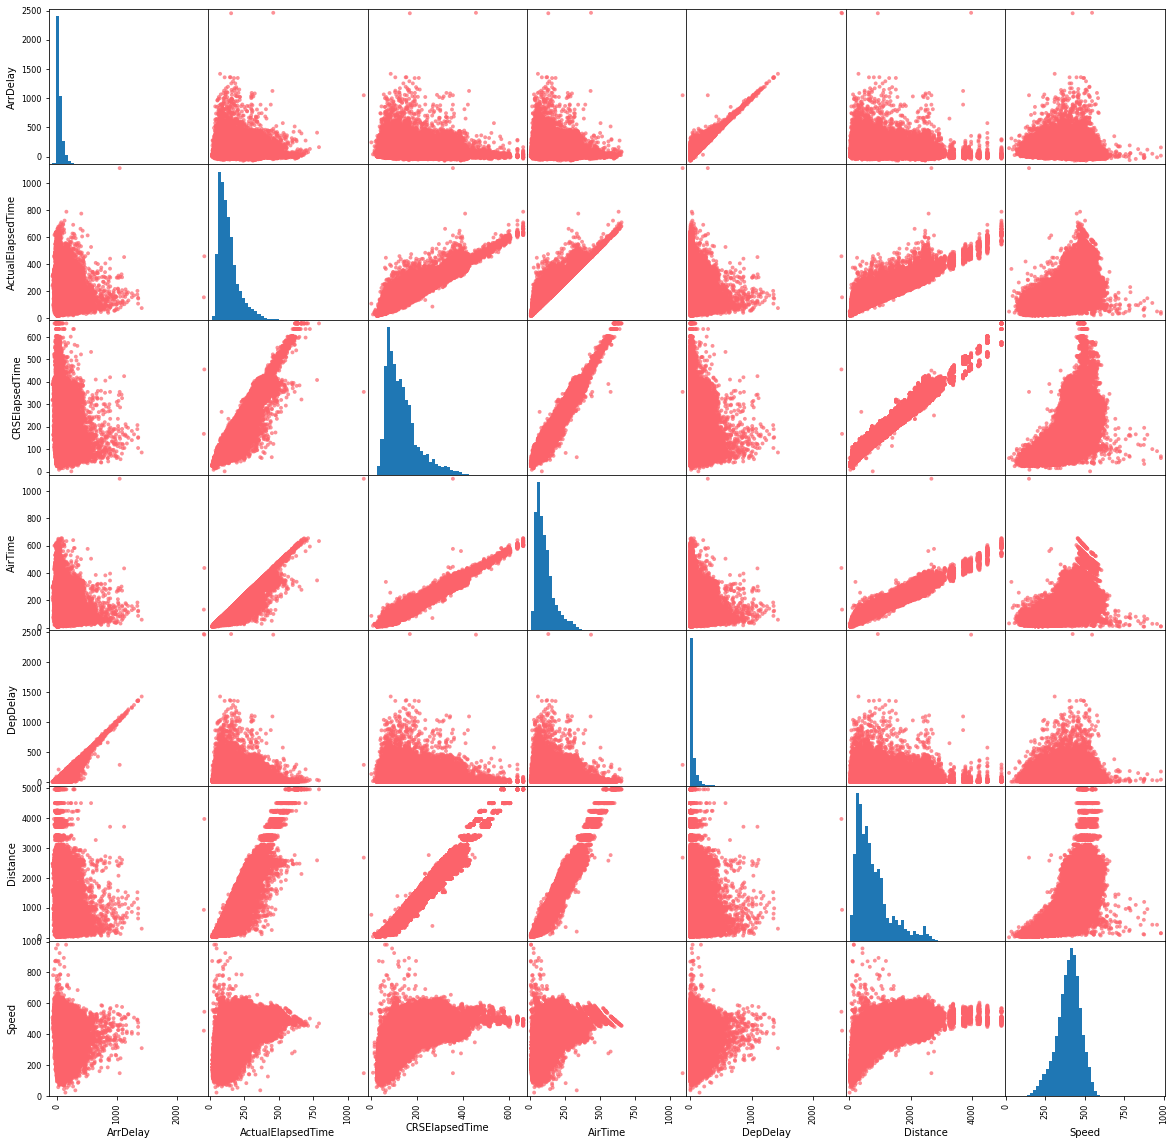

In [43]:
# do the same for the test set  
pd.plotting.scatter_matrix(data_test[cols] , figsize= (20,20),  hist_kwds = {'bins': 50}, alpha = 0.7 , s = 60, 
                           color = '#fc636b'); 


Pairplots are similar for both subsets, in both cases we can see a clear correlation between some of the variables: 

+ ArrDelay -> Has a clear lineal relation with DepDelay
+ ActualElapsedTime -> Highly correlated with CRSElapsedTime, AirTime and Distance 
+ AirTime and Distance -> Highly correlated between each other and also with ActualElapsedTime and CRSElapsedTime. 
+ Speed is not so clearly correlated with the other vatriables 

In the diagonal we can see the distribution for each variable, we see that most of the features (except speed) have rigfht skewed distributions. This may be caused by the presence of outliers. 

Some of the independent variables seem highly correlated with each other, maybe we will have to drop some variables before doing the regression model. We can plot a heatmap and see the correlation between variables, we will select all the numeric variables this time: 

In [44]:
data_train.columns

Index(['ArrDelay', 'ActualElapsedTime', 'CRSElapsedTime', 'AirTime',
       'DepDelay', 'Distance', 'Speed', 'TaxiIn', 'TaxiOut', 'CarrierDelay',
       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay',
       'DepTime', 'CRSDepTime', 'ArrTime', 'CRSArrTime', 'Month', 'DayofMonth',
       'DayOfWeek', 'UniqueCarrier', 'Origin', 'Dest'],
      dtype='object')

#### Heatmaps on numerical features

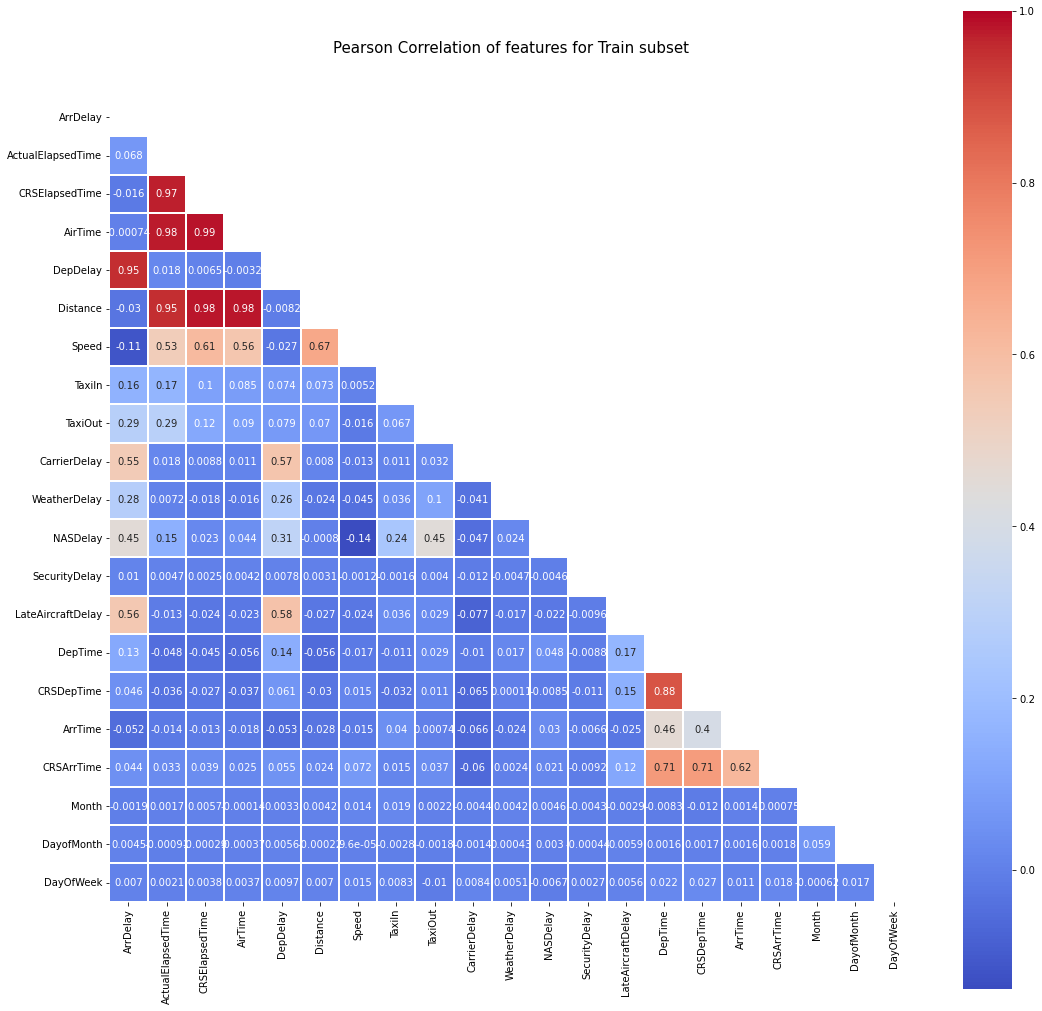

In [45]:
# heatmap for data_train 
numerical_cols =['ArrDelay', 'ActualElapsedTime', 'CRSElapsedTime', 'AirTime',
       'DepDelay', 'Distance', 'Speed', 'TaxiIn', 'TaxiOut', 'CarrierDelay',
       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay',
       'DepTime', 'CRSDepTime', 'ArrTime', 'CRSArrTime', 'Month', 'DayofMonth',
       'DayOfWeek']
plt.figure(figsize = (18,18))

matrix = np.triu(data_train[numerical_cols].astype(float).corr())
sns.heatmap(data_train[numerical_cols].astype(float).corr(), linewidths=0.1,vmax=1.0, square = True, cmap = 'coolwarm', 
            linecolor = 'white', annot = True, mask= matrix)
plt.title('Pearson Correlation of features for Train subset', y=1.05, size = 15); 

Let's do the samer for Test subset. 

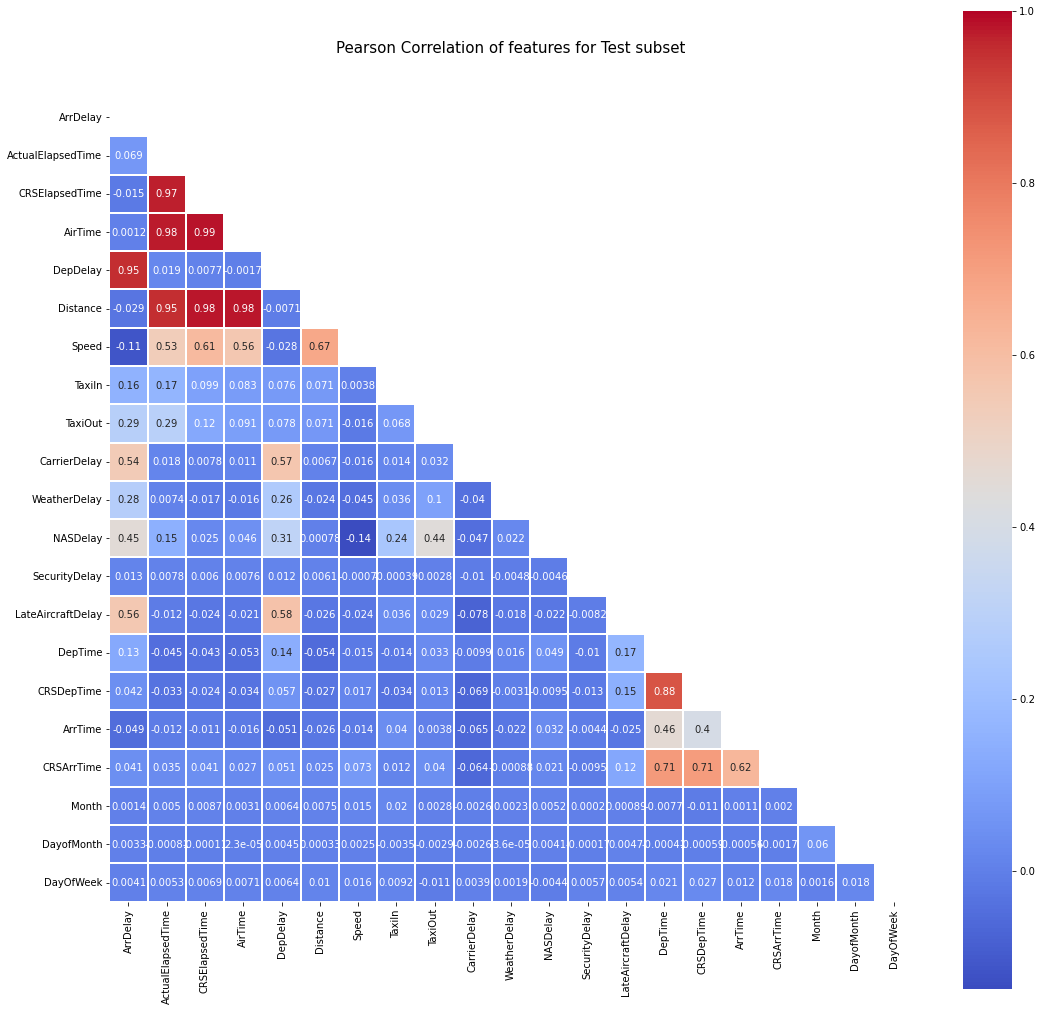

In [46]:
# heatmap for data_test

plt.figure(figsize = (18,18))

matrix = np.triu(data_test[numerical_cols].astype(float).corr())
sns.heatmap(data_test[numerical_cols].astype(float).corr(), linewidths=0.1,vmax=1.0, square = True, cmap = 'coolwarm', 
            linecolor = 'white', annot = True, mask= matrix)
plt.title('Pearson Correlation of features for Test subset', y=1.05, size = 15); 

Both heatmaps seem identical and numerically show the correlations we had already seen in the pairplots above. It´s clear thar exists multicollinearity between some of the independent variables.

Now let´s do summary statistics for these columns: 

In [47]:
# for data_train
cols = ['ArrDelay', 'ActualElapsedTime', 'CRSElapsedTime', 'AirTime','DepDelay', 'Distance', 'Speed', 'TaxiIn', 
        'TaxiOut', 'CarrierDelay','WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay']
data_train[cols].describe().round(2)

,ArrDelay,ActualElapsedTime,CRSElapsedTime,AirTime,DepDelay,Distance,Speed,TaxiIn,TaxiOut,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
count,1349778.00,1349778.00,1349778.00,1349778.00,1349778.00,1349778.00,1349778.00,1349778.00,1349778.00,1349778.00,1349778.00,1349778.00,1349778.00,1349778.00
mean,42.18,133.36,134.25,108.33,43.08,765.31,396.75,6.81,18.21,12.41,2.40,9.71,0.06,16.35
std,56.79,72.12,71.29,68.69,53.27,574.21,75.81,5.27,14.32,36.25,17.41,28.12,1.60,35.89
min,-68.00,14.00,-21.00,3.00,6.00,11.00,33.18,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,9.00,80.00,82.00,58.00,12.00,338.00,351.92,4.00,10.00,0.00,0.00,0.00,0.00,0.00
50%,24.00,116.00,116.00,90.00,24.00,606.00,403.75,6.00,14.00,0.00,0.00,0.00,0.00,0.00
75%,56.00,165.00,165.00,137.00,53.00,998.00,448.10,8.00,21.00,10.00,0.00,6.00,0.00,18.00
max,1951.00,750.00,660.00,733.00,1952.00,4962.00,993.60,240.00,386.00,1951.00,1297.00,1337.00,392.00,1316.00


In [48]:
# same for data_test
data_test[cols].describe().round(2)

,ArrDelay,ActualElapsedTime,CRSElapsedTime,AirTime,DepDelay,Distance,Speed,TaxiIn,TaxiOut,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
count,578477.00,578477.00,578477.00,578477.00,578477.00,578477.00,578477.00,578477.00,578477.00,578477.00,578477.00,578477.00,578477.00,578477.00
mean,42.24,133.19,134.07,108.16,43.13,764.15,396.76,6.80,18.22,12.40,2.39,9.74,0.06,16.39
std,56.76,71.93,71.10,68.51,53.24,573.16,76.00,5.23,14.26,36.09,17.31,28.20,1.69,36.00
min,-70.00,15.00,1.00,7.00,6.00,11.00,21.29,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,9.00,80.00,82.00,58.00,12.00,338.00,351.82,4.00,10.00,0.00,0.00,0.00,0.00,0.00
50%,24.00,116.00,116.00,90.00,24.00,606.00,403.94,6.00,14.00,0.00,0.00,0.00,0.00,0.00
75%,56.00,165.00,165.00,137.00,53.00,997.00,448.29,8.00,21.00,10.00,0.00,6.00,0.00,18.00
max,2461.00,1114.00,660.00,1091.00,2467.00,4962.00,980.00,207.00,422.00,2436.00,1352.00,1357.00,357.00,1236.00


We observe both tables are quite similar, some min and max values may be different possiby due to outliers. We can see this database has heavy outliers speccially in max values in most attributes refering to delayed time, if we compare the quartiles values and  max values we can see that some values are dramatically high!!  

Our target variable (ArrDelay) has a mean of 42.18 minutes in train set and 42.24 minutes in test set.

We can visually see this if we draw boxplots, we will draw the plots of the features that refer to delay time  or flight time since they are all in the same scale(minutes):  

#### Box plots on principal numerical columns

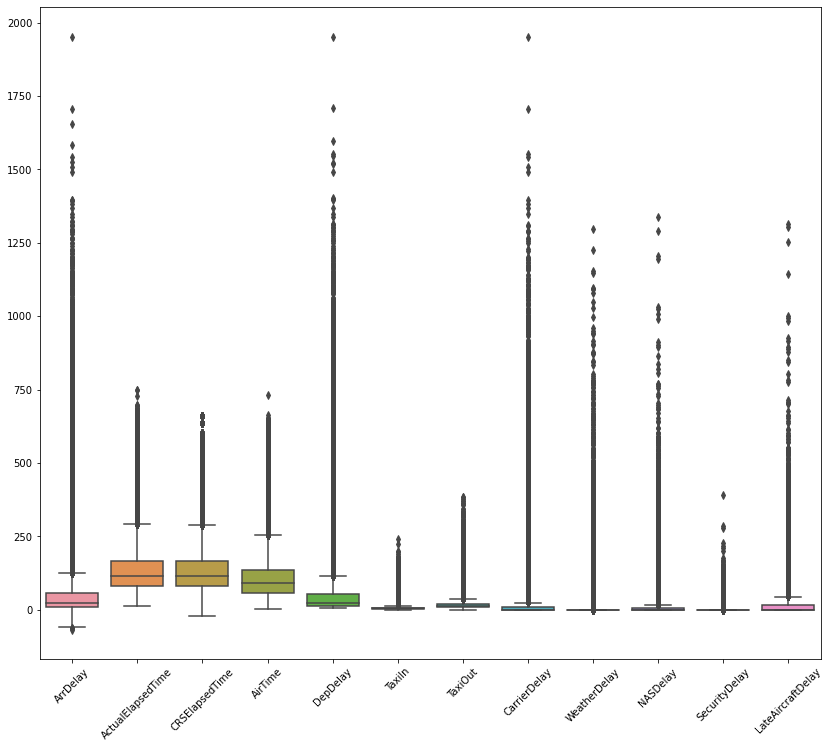

In [49]:
cols = ['ArrDelay', 'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'DepDelay', 'TaxiIn', 'TaxiOut', 'CarrierDelay',
       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay']

# boxplots for data_train 
plt.figure(figsize=(14,12))

sns.boxplot(data = data_train[cols])
plt.xticks(rotation = 45);

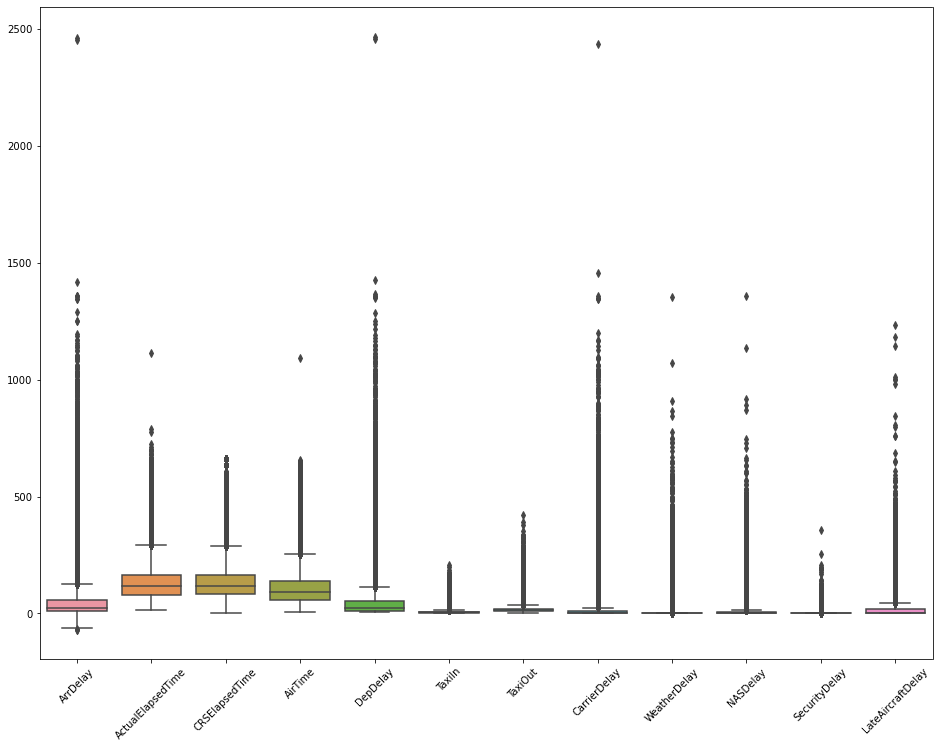

In [50]:
# boxplots for data_test:

plt.figure(figsize=(16,12))

sns.boxplot(data = data_test[cols])
plt.xticks(rotation = 45);


As we had suspected, all these features are heavily affected by the presence of otutliers. 


Now let's check the distribution of our target, 'ArrDelay' column: 

#### Distribution of Arrival delay

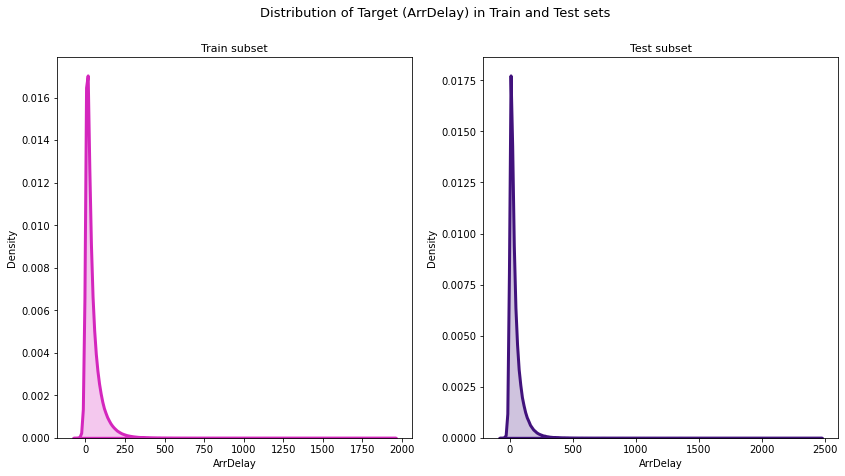

In [51]:
fig, axes = plt.subplots(1,2, figsize= (14,7))

fig.suptitle('Distribution of Target (ArrDelay) in Train and Test sets', fontsize = 13)

sns.kdeplot(ax=axes[0], data= data_train, x="ArrDelay", color= '#d426bd', linewidth = 3, fill = True)
axes[0].set_title('Train subset', fontsize = 11)

sns.kdeplot(ax=axes[1], data= data_test, x="ArrDelay", color= '#41127c', linewidth = 3, fill = True)
axes[1].set_title('Test subset', fontsize = 11); 

We see that ArrDelay is right skewed and looks much more like an exponential distribution than a normal distribution. 

#### Categorical features: 

Now we will look at our categorical features. We will include in this section 'Month' , 'DayOfWeek' and 'DayOfMonth' since they will be easier to interpret this way. 

In [52]:
data_train.columns

Index(['ArrDelay', 'ActualElapsedTime', 'CRSElapsedTime', 'AirTime',
       'DepDelay', 'Distance', 'Speed', 'TaxiIn', 'TaxiOut', 'CarrierDelay',
       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay',
       'DepTime', 'CRSDepTime', 'ArrTime', 'CRSArrTime', 'Month', 'DayofMonth',
       'DayOfWeek', 'UniqueCarrier', 'Origin', 'Dest'],
      dtype='object')

In [53]:
# for data_train
cols = ['Month', 'DayofMonth','DayOfWeek', 'UniqueCarrier', 'Origin', 'Dest']

for i in cols: 
    data_train[i] = data_train[i].astype('str')
data_train[cols].describe()

,Month,DayofMonth,DayOfWeek,UniqueCarrier,Origin,Dest
count,1349778,1349778,1349778,1349778,1349778,1349778
unique,12,31,7,20,303,301
top,12,22,5,WN,ATL,ORD
freq,141482,49897,225510,263298,91784,75997


In [54]:
# for data_test
cols = ['Month', 'DayofMonth','DayOfWeek', 'UniqueCarrier', 'Origin', 'Dest']

for i in cols: 
    data_test[i] = data_test[i].astype('str')
data_test[cols].describe()

,Month,DayofMonth,DayOfWeek,UniqueCarrier,Origin,Dest
count,578477,578477,578477,578477,578477,578477
unique,12,31,7,20,300,302
top,6,22,5,WN,ATL,ORD
freq,60408,21431,96453,112896,39422,32265


In these summaries we can quickly identify the most frequent values for each feature and the number of times they appear. In both train an test sets, the top features are the same in most features: December is the month that appears more times in train subset (June is the top month in test set), 22th is the day of month with more flights. Also, Friday is the day of the week that is more repeated. 

WN is the top Carrier, Atlanta is the most frequent Origin and Orlando the most frequent Destination. 

In [55]:
# change again str columns to numeric 
cols = ['Month', 'DayofMonth','DayOfWeek']
for i in cols: 
    data_test[i] = data_test[i].astype('int64')
    data_train[i] = data_train[i].astype('int64')

Let´s do some plots about Month, DayofMonth and DayofWeek: 

#### Number of flights per Month, Day of Month and Day of Week.

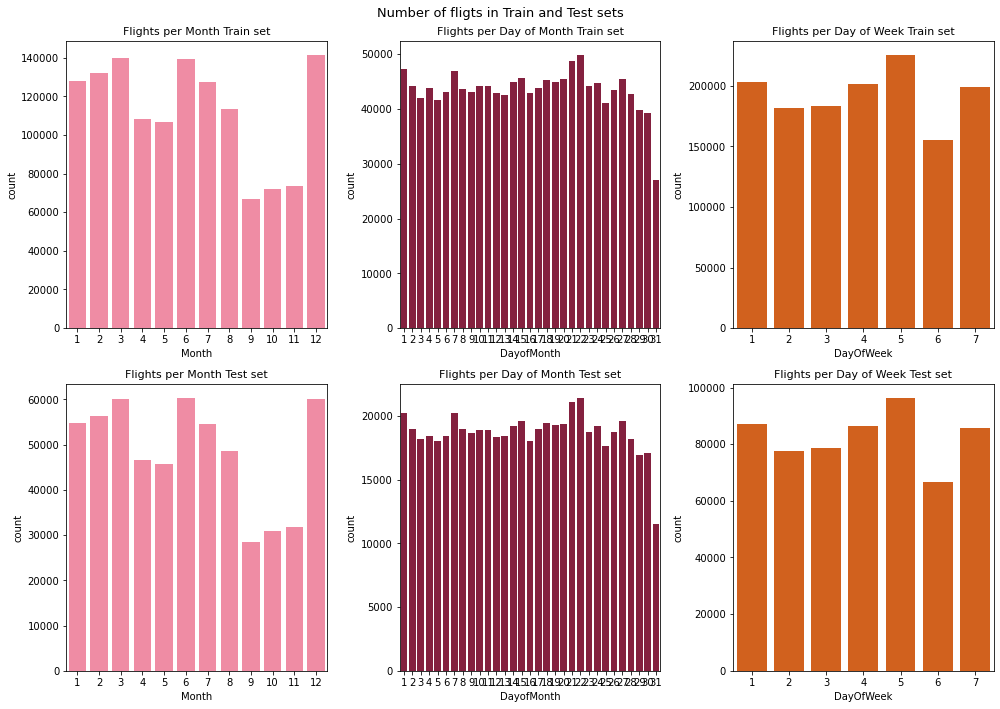

In [56]:
fig, axes = plt.subplots(2,3, figsize= (14,10))
fig.suptitle('Number of fligts in Train and Test sets', fontsize = 13)

sns.countplot(ax = axes[0,0], data = data_train, x= 'Month', color = '#ff7b9c')
axes[0,0].set_title('Flights per Month Train set', fontsize = 11)

sns.countplot(ax = axes[0,1], data = data_train, x= 'DayofMonth', color= '#941039')
axes[0,1].set_title('Flights per Day of Month Train set', fontsize = 11)

sns.countplot(ax = axes[0,2], data = data_train, x= 'DayOfWeek', color= '#ef5a00')
axes[0,2].set_title('Flights per Day of Week Train set', fontsize = 11)

sns.countplot(ax = axes[1,0], data = data_test, x= 'Month', color= '#ff7b9c')
axes[1,0].set_title('Flights per Month Test set', fontsize = 11)

sns.countplot(ax = axes[1,1], data = data_test, x= 'DayofMonth', color= '#941039')
axes[1,1].set_title('Flights per Day of Month Test set', fontsize = 11)

sns.countplot(ax = axes[1,2], data = data_test, x= 'DayOfWeek', color='#ef5a00')
axes[1,2].set_title('Flights per Day of Week Test set', fontsize = 11)

plt.tight_layout(); 

Here we can identify easily the distribution of the fligshts depending on the Day and Month. Since we are interested in predicting Arrival Delay we could also plot the average delay depending on this: 

#### Average Arrival Delay per Month, Day of Month and Day of Week

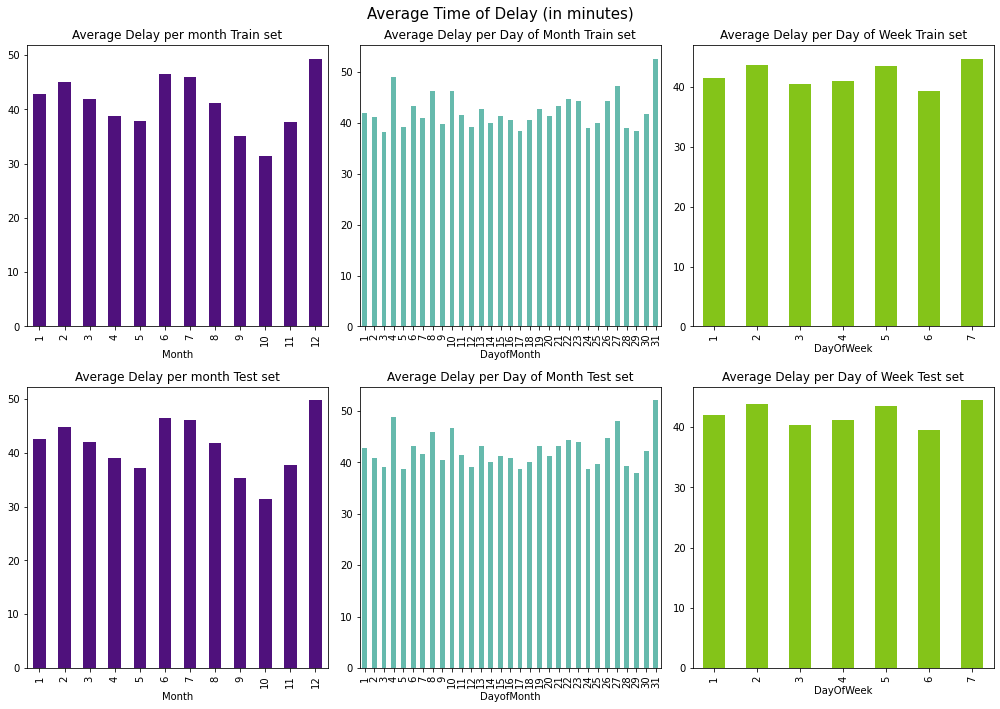

In [57]:
plt.figure(figsize = (14, 10))
plt.suptitle('Average Time of Delay (in minutes)', fontsize = 15)

plt.subplot(231)
data_train.groupby('Month')['ArrDelay'].mean().plot(kind= 'bar', color = '#4f117c')
plt.title('Average Delay per month Train set')

plt.subplot(232)
data_train.groupby('DayofMonth')['ArrDelay'].mean().plot(kind= 'bar', color = '#66baad')
plt.title('Average Delay per Day of Month Train set')

plt.subplot(233)
data_train.groupby('DayOfWeek')['ArrDelay'].mean().plot(kind= 'bar', color = '#84c419')
plt.title('Average Delay per Day of Week Train set')

plt.subplot(234)
data_test.groupby('Month')['ArrDelay'].mean().plot(kind= 'bar', color = '#4f117c')
plt.title('Average Delay per month Test set')

plt.subplot(235)
data_test.groupby('DayofMonth')['ArrDelay'].mean().plot(kind= 'bar', color = '#66baad')
plt.title('Average Delay per Day of Month Test set')

plt.subplot(236)
data_test.groupby('DayOfWeek')['ArrDelay'].mean().plot(kind= 'bar', color = '#84c419')
plt.title('Average Delay per Day of Week Test set')

plt.tight_layout()

+ We can observe that December, June and July are the months that have more delays in average 
+ For some reason, 31th day of the month also has more average delay than the rest. 
+ Tuesdays and Sundays seem to be the days with more delays, but the difference between days is not so significant as in the case of the Month. 

Test and Train sets folow the same patterns. 

#### Unique Carrier

Now let´s look at 'UniqueCarrier', it may be also an importarnt feature for looking at Arrival Delay. Let´s compare the representation of them in train and test subsets, since there are a lot of differences in the size of the carriers (some of them operate a large number of flights and others have very little flights). Since we want each carrier to be properly represented we will look at both subsets of this attribute:

In [58]:
# calculate in % the carriers in each train and test sets
data_train_percent= data_train.UniqueCarrier.value_counts(normalize = True).mul(100).round(2).astype(str) + '%'
data_test_percent = data_test.UniqueCarrier.value_counts(normalize = True).mul(100).round(2).astype(str) + '%'

# we put them together in a dataframe 
carriers_percent = pd.DataFrame(columns = ['data_train', 'data_test'])
carriers_percent['data_train'] = data_train_percent
carriers_percent['data_test'] = data_test_percent
carriers_percent

,data_train,data_test
WN,19.51%,19.52%
AA,9.9%,9.9%
UA,7.32%,7.27%
MQ,7.32%,7.34%
OO,6.84%,6.81%
DL,5.89%,5.91%
XE,5.35%,5.36%
CO,5.17%,5.17%
US,5.08%,5.09%
EV,4.23%,4.27%


We see that even the representation of Carriers is equally distributed in train and test subsets, even the smallets Carriers. 

In [59]:
# for plotting we remove the percent 
carriers_percent[['data_train', 'data_test']] = carriers_percent[['data_train', 
                            'data_test']].apply(lambda x: x.str.rstrip('%').astype('float'))

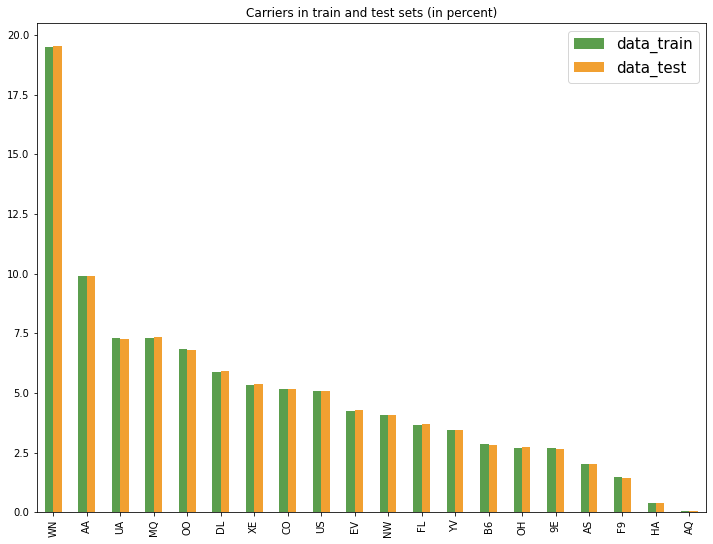

In [60]:
carriers_percent.plot(kind = 'bar', figsize = (12,9), color = ['#5b9e4d', '#f1a031'])
plt.title('Carriers in train and test sets (in percent)')
plt.legend(prop={'size': 15}); 

Here we have the visual confirmation of the table above : distribution of Carriers is equal in train and test sets (WN is the Carrier with more flights and AQ is the one with less flights). 

#### Average Arrival Delay per Carrier 

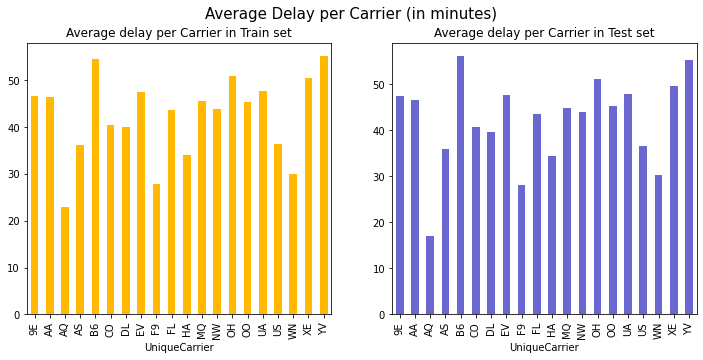

In [61]:
plt.figure(figsize = (12, 5))
plt.suptitle('Average Delay per Carrier (in minutes)', fontsize = 15)

plt.subplot(121)
data_train.groupby('UniqueCarrier')['ArrDelay'].mean().plot(kind= 'bar', color = '#ffb900')
plt.title('Average delay per Carrier in Train set', fontsize = 12)

plt.subplot(122)
data_test.groupby('UniqueCarrier')['ArrDelay'].mean().plot(kind= 'bar', color = '#6a67ce')
plt.title('Average delay per Carrier in Test set', fontsize = 12); 

Looking at this, we notice UniqueCarrier may be an important feature for the prediction of Arrival Delay, there are big differences between Carriers and this is obvious both for train and test sets (B6 and YV are the Carriers that on average have more delays). 

In [62]:
# save the file to not run the notebook each time 
data.to_csv('data.csv', index = False)

**Due to the size of the file, the 2nd and 3rd part of the exercise are continued on a second Notebook**




